In [1]:
### Load libraries -------
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import os
import numpy as np
from datetime import datetime

# Pandas parameters
#pd.set_option('display.max_colwidth', -1)
#pd.set_option('display.max_rows', 2000)
#pd.set_option('display.max_columns', 500)

In [2]:
### Define out paths ------

# check if out path exists, if it does not exists add the path
if not os.path.exists('/Users/hannahfrank/desktop/conflict_escalation_out'):
    os.makedirs('/Users/hannahfrank/desktop/conflict_escalation_out')

# add subfolders for the out path
out_paths = {
    "desciptive_plots_outcome": '/Users/hannahfrank/desktop/conflict_escalation_out/plots',
    "data": '/Users/hannahfrank/desktop/conflict_escalation_out/data'
}

for key, val in out_paths.items():
    if not os.path.exists(val):
        os.makedirs(val)
        
out_paths["data"]

'/Users/hannahfrank/desktop/conflict_escalation_out/data'

In [3]:
### UCDP Georeferenced Event Dataset (GED) Global version 20.1 ----------
# Codebook: https://ucdp.uu.se/downloads/ged/ged201.pdf

ucdp = pd.read_csv("https://ucdp.uu.se/downloads/ged/ged201-csv.zip", low_memory=False)
ucdp.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18 00:00:00.000,0,0,0,4,4,4,0,700,NaN


In [4]:
### Get columns --------
for i in ucdp.columns:
    print(i)

id
relid
year
active_year
code_status
type_of_violence
conflict_dset_id
conflict_new_id
conflict_name
dyad_dset_id
dyad_new_id
dyad_name
side_a_dset_id
side_a_new_id
side_a
side_b_dset_id
side_b_new_id
side_b
number_of_sources
source_article
source_office
source_date
source_headline
source_original
where_prec
where_coordinates
where_description
adm_1
adm_2
latitude
longitude
geom_wkt
priogrid_gid
country
country_id
region
event_clarity
date_prec
date_start
date_end
deaths_a
deaths_b
deaths_civilians
deaths_unknown
best
high
low
gwnoa
gwnob


In [5]:
### Only use state-based violence -----
ucdp_s = ucdp[(ucdp["type_of_violence"]==1)]

In [6]:
### Exclude state-based between governments ------
ucdp_ss = ucdp_s.loc[(ucdp_s["dyad_name"] != "Government of Afghanistan - Government of United Kingdom, Government of United States of America") &
                    (ucdp_s["dyad_name"] != "Government of Cambodia (Kampuchea) - Government of Thailand") &
                    (ucdp_s["dyad_name"] != "Government of Cameroon - Government of Nigeria") &
                    (ucdp_s["dyad_name"] != "Government of Djibouti - Government of Eritrea") &
                    (ucdp_s["dyad_name"] != "Government of Ecuador - Government of Peru") &
                    (ucdp_s["dyad_name"] != "Government of Eritrea - Government of Ethiopia") &
                    (ucdp_s["dyad_name"] != "Government of India - Government of Pakistan") &
                    (ucdp_s["dyad_name"] != "Government of Iraq - Government of Kuwait") &
                    (ucdp_s["dyad_name"] != "Government of Australia, Government of United Kingdom, Government of United States of America - Government of Iraq") &
                    (ucdp_s["dyad_name"] != "Government of Panama - Government of United States of America") &
                    (ucdp_s["dyad_name"] != "Government of South Sudan - Government of Sudan") &
                    (ucdp_s["dyad_name"] != "Government of Iran - Government of Israel")]

ucdp_ss.head(3)

,id,relid,year,active_year,code_status,type_of_violence,conflict_dset_id,conflict_new_id,conflict_name,dyad_dset_id,...,date_end,deaths_a,deaths_b,deaths_civilians,deaths_unknown,best,high,low,gwnoa,gwnob
0,244657,IRQ-2017-1-524-322,2017,1,Clear,1,259,259,Iraq: Government,524,...,2017-07-31 00:00:00.000,0,4,0,2,6,6,6,645,NaN
1,132140,AFG-1989-1-411-2,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-13 00:00:00.000,6,0,0,0,6,6,6,700,NaN
2,130364,AFG-1989-1-411-37,1989,1,Clear,1,333,333,Afghanistan: Government,724,...,1989-01-18 00:00:00.000,0,0,0,4,4,4,0,700,NaN


In [7]:
### Subset columns -----
ucdp_sub = ucdp_ss[[
                #"id",
                #"relid",
                "year",
                "active_year",
                #"code_status",
                #"type_of_violence",
                #"conflict_dset_id",
                #"conflict_new_id",
                #"conflict_name",
                #"dyad_dset_id",
                #"dyad_new_id",
                #"dyad_name",
                #"side_a_dset_id",
                #"side_a_new_id",
                #"side_a",
                #"side_b_dset_id",
                #"side_b_new_id",
                #"side_b",
                #"number_of_sources",
                #"source_article",
                #"source_office",
                #"source_date",
                #"source_headline",
                #"source_original",
                #"where_prec",
                #"where_coordinates",
                #"where_description",
                #"adm_1",
                #"adm_2",
                #"latitude",
                #"longitude",
                #"geom_wkt",
                #"priogrid_gid",
                "country",
                "country_id",
                #"region",
                #"event_clarity",
                "date_prec",
                "date_start",
                "date_end",
                #"deaths_a",
                #"deaths_b",
                #"deaths_civilians",
                #"deaths_unknown",
                "best",
                "high",
                "low",
                #"gwnoa",
                #"gwnob",
                ]]

ucdp_sub.head(3)

,year,active_year,country,country_id,date_prec,date_start,date_end,best,high,low
0,2017,1,Afghanistan,700,1,2017-07-31 00:00:00.000,2017-07-31 00:00:00.000,6,6,6
1,1989,1,Afghanistan,700,3,1989-01-07 00:00:00.000,1989-01-13 00:00:00.000,6,6,6
2,1989,1,Afghanistan,700,2,1989-01-15 00:00:00.000,1989-01-18 00:00:00.000,4,4,0


In [8]:
### Add dates ----
ucdp_sub["dd_date_start"] = pd.to_datetime(ucdp_sub['date_start'], 
                               format='%Y-%m-%d %H:%M:%S')

ucdp_sub["dd_date_end"] = pd.to_datetime(ucdp_sub['date_end'], 
                               format='%Y-%m-%d %H:%M:%S')

# Only store month
ucdp_sub["month_date_start"] = ucdp_sub["dd_date_start"].dt.strftime('%m')
ucdp_sub["month_date_end"] = ucdp_sub["dd_date_end"].dt.strftime('%m')


ucdp_date = ucdp_sub[["year",
                     "dd_date_start",
                     "dd_date_end",
                     "active_year",
                     "country",
                     "country_id",
                     "date_prec", 
                     "best",
                     "high",
                     "low",
                     "month_date_start",
                     "month_date_end"]]

# Reset index 
ucdp_date = ucdp_date.sort_values(by=["country", "year"], 
                                  ascending=True)

ucdp_date.reset_index(drop=True, inplace=True)
ucdp_date.head(3)

<ipython-input-8-e0a7b24a0b3f>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ucdp_sub["dd_date_start"] = pd.to_datetime(ucdp_sub['date_start'],
<ipython-input-8-e0a7b24a0b3f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ucdp_sub["dd_date_end"] = pd.to_datetime(ucdp_sub['date_end'],
<ipython-input-8-e0a7b24a0b3f>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: h

,year,dd_date_start,dd_date_end,active_year,country,country_id,date_prec,best,high,low,month_date_start,month_date_end
0,1989,1989-01-07,1989-01-13,1,Afghanistan,700,3,6,6,6,01,01
1,1989,1989-01-15,1989-01-18,1,Afghanistan,700,2,4,4,0,01,01
2,1989,1989-01-23,1989-01-24,1,Afghanistan,700,2,600,600,600,01,01


In [9]:
### Loop through data and delete observations which last one month ------
ucdp_final = ucdp_date.copy()

for i in range(0,len(ucdp_date)):
    if ucdp_date["month_date_start"].loc[i]!=ucdp_date["month_date_end"].loc[i]:
        ucdp_final = ucdp_final.drop(index=i, axis=0)

In [10]:
### Check ----
np.unique(list(ucdp_final["month_date_start"] == ucdp_final["month_date_end"]))

array([ True])

In [11]:
### Generate year_month variable --------
ucdp_final['year_month'] = pd.to_datetime(ucdp_final['dd_date_start'], 
                                          format='%Y-%m').dt.to_period('M')
ucdp_final

,year,dd_date_start,dd_date_end,active_year,country,country_id,date_prec,best,high,low,month_date_start,month_date_end,year_month
0,1989,1989-01-07,1989-01-13,1,Afghanistan,700,3,6,6,6,01,01,1989-01
1,1989,1989-01-15,1989-01-18,1,Afghanistan,700,2,4,4,0,01,01,1989-01
2,1989,1989-01-23,1989-01-24,1,Afghanistan,700,2,600,600,600,01,01,1989-01
4,1989,1989-01-31,1989-01-31,1,Afghanistan,700,1,70,70,70,01,01,1989-01
5,1989,1989-02-04,1989-02-04,1,Afghanistan,700,1,20,20,0,02,02,1989-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...
165394,2019,2019-12-24,2019-12-24,1,Yemen (North Yemen),678,1,17,24,17,12,12,2019-12
165395,2019,2019-12-24,2019-12-24,1,Yemen (North Yemen),678,1,1,1,1,12,12,2019-12
165396,2019,2019-12-29,2019-12-29,1,Yemen (North Yemen),678,1,10,10,5,12,12,2019-12
165397,2019,2019-02-04,2019-02-04,0,Yemen (North Yemen),678,1,2,2,0,02,02,2019-02


In [12]:
### Aggregate fatality variables by year-dyad_id  ---------------
best = pd.DataFrame(ucdp_final.groupby(["year",
                                    "year_month",
                                    "country_id",
                                    "country"])['best'].sum())
high = pd.DataFrame(ucdp_final.groupby(["year",
                                    "year_month",
                                    "country_id",
                                    "country"])['high'].sum())
low = pd.DataFrame(ucdp_final.groupby(["year", 
                                   "year_month",    
                                   "country_id",
                                   "country"])['low'].sum())
best.head()

best
year year_month country_id country          
1989 1989-01    90         Guatemala      28
                92         El Salvador   126
                93         Nicaragua       8
                100        Colombia        9
                135        Peru           99

In [13]:
### Merge fatality variables and reset index ----------------
best_high = pd.concat([best, high], axis=1)
fat =  pd.concat([best_high, low], axis=1)
fat.head()

if "year" in fat == False:
    fat["year"] = fat.index.get_level_values(0)

if "country_id" in fat == False:
    fat["country_id"] = fat.index.get_level_values(1)
    
ucdp_final = fat.reset_index()
ucdp_final.head()

,year,year_month,country_id,country,best,high,low
0,1989,1989-01,90,Guatemala,28,28,28
1,1989,1989-01,92,El Salvador,126,136,126
2,1989,1989-01,93,Nicaragua,8,10,8
3,1989,1989-01,100,Colombia,9,9,9
4,1989,1989-01,135,Peru,99,99,99


In [14]:
### Get countries and years ------
years = list(ucdp_final.year.unique())
countries = list(ucdp_final.country_id.unique())

In [15]:
### Make range of time stamps to add -------
date = list(pd.date_range(start="1989-01",
                          end="2019-12", 
                          freq="MS"))
date = pd.to_datetime(date, format='%Y-%m').to_period('M')
date[0]

Period('1989-01', 'M')

In [16]:
### Add missing observation to time series --------

# Loop through every year for every dyad
for i in range(0, len(countries)):
    print(countries[i])
    for x in range(0, len(date)):
        #print(year_months[x])
        
        # Check if country-month in data, if False add
        if ((ucdp_final['year_month'] == date[x]) 
            & (ucdp_final['country_id'] == countries[i])).any() == False:
                
                s = {'year_month': date[x].strftime('%Y-%m'),
                     'year': date[x].year,
                     'country': ucdp_final['country'].loc[(ucdp_final["country_id"]==countries[i])].iloc[0],
                     'country_id': [countries[i]], 
                     'best': 0,
                     'high': 0,
                     'low': 0}
                s = pd.DataFrame(data=s)
                ucdp_final = pd.concat([ucdp_final,s])  

90
92
93
100
135
200
530
540
541
625
700
750
780
840
150
520
660
775
800
640
811
41
230
500
910
666
850
600
771
260
812
95
483
581
360
450
365
645
770
433
630
710
210
522
432
52
516
437
517
615
451
345
436
372
373
101
371
160
359
344
346
702
220
651
940
404
325
484
531
70
490
678
338
790
760
570
501
704
339
703
565
343
438
482
2
475
670
694
652
130
435
696
620
626
820
369
471
616
663
211
439
900


In [21]:
### Check --------
ucdp_final[["best", "year_month"]].loc[(ucdp_final["year"]==2019) &
                            (ucdp_final["country"]=="Somalia")]

,best,year_month
8467,383,2019-01
8496,230,2019-02
8524,115,2019-03
8556,18,2019-04
8585,201,2019-05
8617,102,2019-06
8645,165,2019-07
8675,130,2019-08
8703,203,2019-09
8734,114,2019-10


In [18]:
### Reset index -------
ucdp_final.reset_index(drop=False, 
                inplace=False)
ucdp_final.head(3)

,year,year_month,country_id,country,best,high,low
0,1989,1989-01,90,Guatemala,28,28,28
1,1989,1989-01,92,El Salvador,126,136,126
2,1989,1989-01,93,Nicaragua,8,10,8


In [19]:
### Save dataset -----------
ucdp_final.to_csv(os.path.join(out_paths["data"], 
                            "ucdp.csv"),
                             index=False, 
                             sep=',')

In [ ]:
ucdp_final[[]]

TypeError: float() argument must be a string or a number, not 'Period'

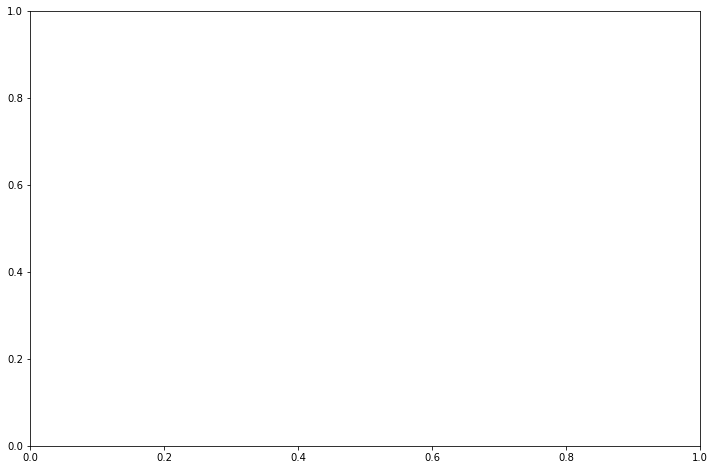

In [33]:
### Make plot for some selected time series ----------
fig = plt.figure(figsize=(12, 8))
ax = plt.axes()

ax.plot(ucdp_final["year_month"].loc[(ucdp_final["year"]==2019) &
                            (ucdp_final["country"]=="Somalia")].values,
        ucdp_final["best"].loc[(ucdp_final["year"]==2019) &
                            (ucdp_final["country"]=="Somalia")].values,
        color="black", 
        linestyle="solid")

# Labels
#ax.set_ylabel('Number of Battle Events (in thousands)', 
#                fontsize = 25, 
#                fontname='Times New Roman')

#ax.set_xlabel('Time (years)', 
#                fontsize = 25, 
#                fontname='Times New Roman')

# Ticks
#str_month_list = ['January','February','March','April','May','June','July','August','September','October','November','December']
#ax.set_xticks(range(0,12))
#ax.set_xticklabels(str_month_list)

#ax.tick_params(axis='x', 
 #              labelsize=25)

#ax.set_yticks(np.arange(0, 
#                       24, 
#                       2))
#ax.tick_params(axis='y', 
 #              labelsize=25)

#for tick in ax.get_xticklabels():
#    tick.set_fontname("Times New Roman")
#for tick in ax.get_yticklabels():
#    tick.set_fontname("Times New Roman")

#ax.legend(bbox_to_anchor=(1, 1), 
#          prop={'size': 15, 
#                'family': 'Times New Roman'})

#fig.savefig(os.path.join(out_paths["desciptive_plots_outcome"], 
#                         f"_battle_events"), 
#                         dpi=100)